In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chargement d'un dataframe

In [18]:
data = pd.read_excel('titanic3.xls')
# Par défaut, l'index du dataframe est une autre colonne avec un entier qui s'incrémente.
# Il est possible de redéfinir l'index pour utiliser une colonne particulière du dataframe
data.set_index('name')

# On peut spécifier la colonne index à l'ouverture du fichier
# parse_dates pour indiquer qu'on veut traiter les dates comme TimeSeries
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [16]:
print(data.shape)      # Taille du dataframe
print(data.columns)    # Titre des colonnes
print(data.head())     # Premières lignes


(1046, 4)
Index(['pclass', 'survived', 'sex', 'age'], dtype='object')
   pclass  survived     sex      age
0       1         1  female  29.0000
1       1         1    male   0.9167
2       1         0  female   2.0000
3       1         0    male  30.0000
4       1         0  female  25.0000


3    501
1    284
2    261
Name: pclass, dtype: int64

# Nettoyage des données
## Suppression des données inutiles

In [34]:
# Supprime les colonnes indiquées
data = data.drop(['ticket', 'name', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.fillna(data['age'].mean())    # Remplace les valeurs N/A par une valeur arbitraire
data = data.dropna(axis=0)     # Supprime les lignes qui contiennent des valeurs N/A

# Pour les fonctions précédentes, il existe un paramètre inplace

# Manipulation de plusieurs dataframes

,Close_BTC,Close_ETH
Close_BTC,1.00000,0.71783
Close_ETH,0.71783,1.00000


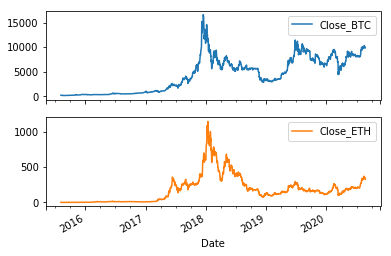

In [32]:
# Merge de 2 dataframes
# =====================

# Merge sur les colonnes index des 2 dataframes
btc_eth = pd.merge(bitcoin, ethereum, left_index=True, right_index=True, how='inner', suffixes=('_BTC', '_ETH'))
# how peut prendre les valeurs inner, outer, left, right

# Merge sur des colonnes autres que les index
# pd.merge(bitcoin, ethereum, left_on='...', right_on='...')  # Indique les noms des colonnes à utiliser
# pd.merge(bitcoin, ethereum, on='...')   # si les colonnes ont les mêmes noms à gauche et à droite
# bitcoin.merge(ethereum, on='...')    # Autre façon d'écrire


btc_eth[['Close_BTC', 'Close_ETH']].plot(subplots=True)
btc_eth[['Close_BTC', 'Close_ETH']].corr()

# Première analyse
## Stats sur les données

In [30]:
data.describe()        # Affiche le stats de base pour chaque colonne
data['pclass'].value_counts()   # Compte le nb d'occurence de chaque valeur
data.groupby(['sex']).mean()    # Regroupe les données selon un critère pour ensuite les analyser

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [37]:
# Les fonctions de boolean indexing fonctionnent également
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

## Modification des données

In [1]:
# Pour accéder directement à certaines valeurs, on utilise iloc (index localization) et loc
data.iloc[0:10:2, 1:]
# loc permet de travailler avec les noms des colonnes
data.loc[0:10:2, ['age', 'sex']]
# Fonctionne également avec du boolean indexing
data.loc[data['age'] <= 20, ['age']] = 0

NameError: name 'data' is not defined

In [ ]:
# Mapping d'une fonction pour modifier les données
# ===============================================

# Définition d'une fonction
def myFunc(value):
    return value*2

# Mapping de la fonction sur les données du dataframe
data['age'].map(myFunc)   # Attention, ne modifie pas les données, mais retourne une colonne avec les valeurs
                          # modifiées. Il faut réaliser l'affectation.

# fonctionne également avec des lambda
data['age'] = data['age'].map(lambda x: x+1)

## Grahiques

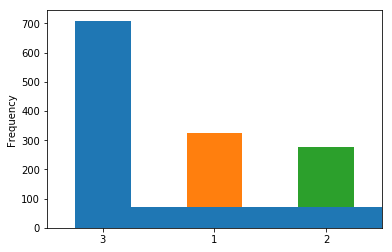

In [3]:
data['pclass'].value_counts().plot.bar()   # Affiche un graph directement depuis Pandas (nécessite d'avoir
                                           # importé MatPlotLib)
data['age'].plot.hist()

## Time series
Comme on a indiqué parse_dates=True à l'ouverture du fichier, les dates sont traitées de manière spécifiques.
Il est possible de faire des tris et des sélections de manière avancée.

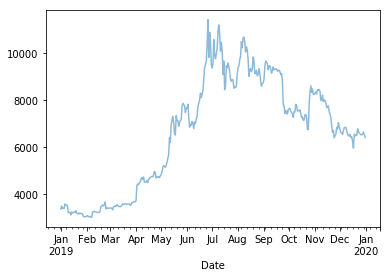

In [56]:
bitcoin['2019']    # Sélection d'une année complète
bitcoin['2019-09'] # Sélection d'un mois
bitcoin['2018':'2020']   # Sélection d'une plage d'années
bitcoin['2018-01' : '2018-07']    # Sélection d'une plage de mois
bitcoin['2019-07':'2019-07':2]    # Un jour sur 2 d'un mois précis
bitcoin.loc['2019-07-09']    # Besoin d'utiliser loc pour accéder à une ligne précise

bitcoin['2019']['Close'].plot()

## Moyenne glissante

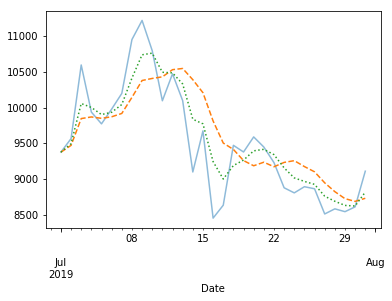

In [68]:
bitcoin.loc['2019-07', 'Close'].plot(alpha=0.5)
bitcoin.loc['2019-07','Close'].rolling(window='7d').mean().plot(ls='--')
bitcoin.loc['2019-07','Close'].ewm(alpha=0.4).mean().plot(ls=':')
